# <center> Jupyter Notebooks in Action </center>
<center> Christian Ritter </center>
<center> critter@uvic.ca </center>

<center> Notebooks @ https://github.com/chritter/Talks/blob/master/VicPiMakers </center> 


## Setting up Jupyter

* Notebook server start with `jupyter notebook`
* Jupyter Notebook App starts dashboard
* Port of choice 
* separate configuration files
* GUI through browser
* Notebooks are in JSON format and human readable (metadata editable)
* Configuration: jupyter_notebook_config.py
* Support:
    * Chrome
    * Safari
    * Firefox


In [30]:
%connect_info

{
  "shell_port": 52915,
  "iopub_port": 52916,
  "stdin_port": 52917,
  "control_port": 52918,
  "hb_port": 52919,
  "ip": "127.0.0.1",
  "key": "765f776a-606cad4b273486a47f0038b6",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-99c2fecf-4889-4b16-a164-42194f682d5b.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


## Standard capabilities

### Basic Python

* Only execution of one cell at a time
* Serves as analysis, analytics platform but not for software development
* Basic cell types are code cells and markdown cells 

In [31]:
a = 3
print(a)

3


Standard markdown Markdown
* Test
`Test`
***Test***

and Latex

$\int_0^3 x^2 dx$

In [32]:
import pandas as pd
pd.DataFrame({'aa':[1,2,3],'bb':[2,3,4]})

,aa,bb
0,1,2
1,2,3
2,3,4


### Plotting

* Supports standard plotting capabilities of Python
* Supports different backends such as the interactive `nbagg` backend

In [33]:
import matplotlib.pyplot as plt
%matplotlib nbagg

<IPython.core.display.Javascript object>


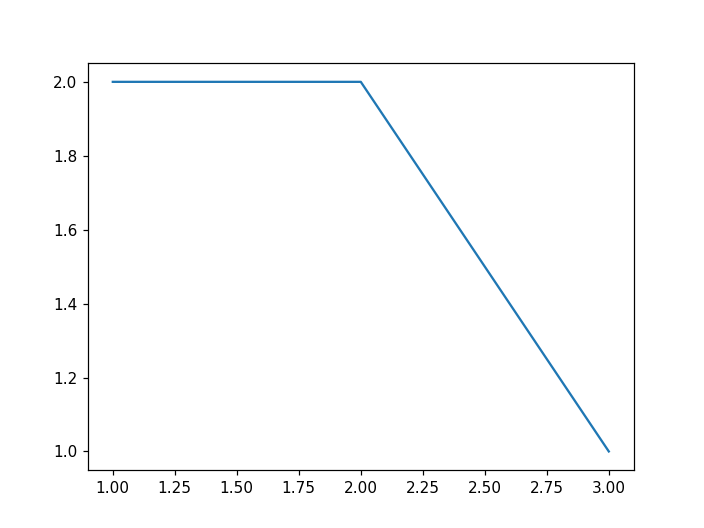

In [34]:
plt.plot([1,2,3],[2,2,1])
plt.savefig('line_plot.png')

rendering images
![title](line_plot.png)

### Converting to other formats

* Use GUI `File` tab
* Command line via `nbconvert`

In [35]:
%%bash
jupyter nbconvert CapabilityDemos.ipynb --to python  #--to pdf

[NbConvertApp] Converting notebook CapabilityDemos.ipynb to python
[NbConvertApp] Writing 4044 bytes to CapabilityDemos.py


### Processing kernels

* A variety of kernels allow to run Python2/3, Bash, R, Scala: https://github.com/jupyter/jupyter/wiki/Jupyter-kernels
* `Kernel` menu

* [RNotebook.ipynb](RNotebook.ipynb)

### Shell commands

In [46]:
!ls

CapabilityDemos.ipynb   JupyterLab.ipynb        RNotebook.ipynb
CapabilityDemos.py      OtherApplications.ipynb line_plot.png
DependA.ipynb           README.md               utils.py


### Notebook magic

In [37]:
%%time
#Other magic commands available:
a = [i for i in range(1000000)]

CPU times: user 78.6 ms, sys: 28.2 ms, total: 107 ms
Wall time: 111 ms


Default kernel for notebook plus kernel can be switched via magic commands

### Executing external code

In [38]:
%run utils.py

In [39]:
test_func()

executed test_func


### Security

* Trusted notebooks: signature in notebook metadata ensures safe execution

    `jupyter trust mynotebook.ipynb`

* Password protection through jupyter_notebook_config.py

In [40]:
#from notebook.auth import passwd
#passwd()

### Workflow

* Create notebook/project (github?)
* Create reproducable analysis (beware of random numbers)
* Add layouts, organization
* Publish/Share

## Fancy stuff

### Deploying Notebooks

* Viewer for notebooks @ https://nbviewer.jupyter.org/
* Run your own Jupyter server in the cloud. 
* Rendering on GitHub

### Presenting results

* https://damianavila.github.io/RISE/
* https://github.com/Anaconda-Platform/nbpresent#install

## Reading from other Jupyter notebooks

Disadvantage: Notebooks are typically separate workflows.

In [41]:
import json

In [42]:
f1 = open('DependA.ipynb')
lines=f1.readlines()
f1.close()

str_dum = ''
for l in lines:
    str_dum +=l

In [43]:
d = json.loads(str_dum)

In [44]:
d['cells']

[{'cell_type': 'code',
  'execution_count': 5,
  'metadata': {},
  'outputs': [],
  'source': ['time = 3. #s\n', 'distance = 5. #m']},
 {'cell_type': 'code',
  'execution_count': 6,
  'metadata': {},
  'outputs': [{'data': {'text/plain': ['1.6666666666666667']},
    'execution_count': 6,
    'metadata': {},
    'output_type': 'execute_result'}],
  'source': ['velocity = distance/time #m/s\n', 'velocity']},
 {'cell_type': 'code',
  'execution_count': None,
  'metadata': {},
  'outputs': [],
  'source': []}]

In [45]:
for cell in d['cells']:
    if len(cell['source'])>0:
        if 'velocity' in cell['source'][-1]:
            print(cell['outputs'][0]['data']['text/plain'])

['1.6666666666666667']


## Adding other content

In [9]:
from IPython.display import YouTubeVideo

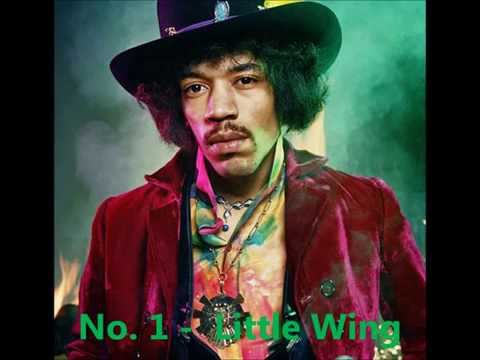

In [11]:
#https://www.youtube.com/watch?v=Iuj9vLOvVJo
YouTubeVideo("Iuj9vLOvVJo")

### Widgets

* Interactive widgets (buttons, levels etc.) at http://jupyter.org/widgets
* Easy integration with existing code, e.g. functions

In [24]:
from ipywidgets import interactive
def myfunction(x):
    return x
w = interactive(myfunction, x= "Hello World ");
from IPython.display import display
display(w)

interactive(children=(Text(value='Hello World ', description='x'), Output()), _dom_classes=('widget-interact',))

* Building complex widgets: http://nugrid.github.io/NuPyCEE/webinterface.html